In [1]:
from __future__ import print_function, division
import torch
torch.manual_seed(0)
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
np.random.seed(0)
import torchvision

from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

In [2]:
data_dir = '/Users/arghachakraborty/Projects/CV_assignments/data/train_last'
data_dir_test = '/Users/arghachakraborty/Projects/CV_assignments/data/test'
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([
                                       transforms.ToTensor()
                                       ])
    test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                      ])
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    num_train = len(train_data)
    print(num_train)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=8)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=8)
    return trainloader, testloader, num_train
trainloader, testloader, num_train_data_set = load_split_train_test(data_dir, .2)
_, testloader2, num_train_data_set2 = load_split_train_test(data_dir_test, .9)
print(trainloader.dataset.classes)
classes = trainloader.dataset.classes
num_train_data_set2

2997
173
['next', 'prev', 'stop']


173

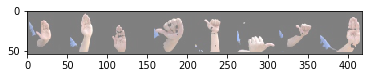

 stop  stop  stop  prev  prev  next  prev  stop


In [3]:
import matplotlib.pyplot as plt


# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F



class Net(nn.Module):
    def __init__(self):
        torch.manual_seed(0)
        np.random.seed(0)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1936, 256)
        self.fc2 = nn.Linear(256, 20)
        self.fc3 = nn.Linear(20, 3)
        self.dropout = nn.Dropout(p = 0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 1936)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#print(c1.shape())


net = Net()
net

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1936, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001 )

In [6]:
for epoch in range(6):  # loop over the dataset multiple times
    running_loss = 0.0
    #loss_values = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #loss_values.append(running_loss/num_train_data_set)
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 20),end="")
            running_loss = 0.0
            correct2 = 0
            total2 = 0
            with torch.no_grad():
                for data in testloader2:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total2 += labels.size(0)
                    correct2 += (predicted == labels).sum().item()

            print('Test Acc: %d %%' % (100 * correct2 / total2),end="")
            correct = 0
            total = 0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Validation acc: %d %%' % (100 * correct / total))
    


print('Finished Training')

[1,    20] loss: 1.103Test Acc: 45 %Validation acc: 52 %
[1,    40] loss: 1.089Test Acc: 46 %Validation acc: 57 %
[1,    60] loss: 1.013Test Acc: 30 %Validation acc: 51 %
[1,    80] loss: 0.963Test Acc: 24 %Validation acc: 46 %
[1,   100] loss: 0.999Test Acc: 32 %Validation acc: 53 %
[1,   120] loss: 0.895Test Acc: 43 %Validation acc: 68 %
[1,   140] loss: 0.803Test Acc: 60 %Validation acc: 71 %
[1,   160] loss: 0.650Test Acc: 52 %Validation acc: 78 %
[1,   180] loss: 0.599Test Acc: 69 %Validation acc: 82 %
[1,   200] loss: 0.509Test Acc: 69 %Validation acc: 86 %
[1,   220] loss: 0.358Test Acc: 74 %Validation acc: 89 %
[1,   240] loss: 0.386Test Acc: 66 %Validation acc: 83 %
[1,   260] loss: 0.300Test Acc: 76 %Validation acc: 89 %
[1,   280] loss: 0.306Test Acc: 81 %Validation acc: 93 %
[1,   300] loss: 0.217Test Acc: 76 %Validation acc: 93 %
[2,    20] loss: 0.204Test Acc: 77 %Validation acc: 90 %
[2,    40] loss: 0.197Test Acc: 77 %Validation acc: 92 %
[2,    60] loss: 0.184Test Acc:

In [17]:
PATH = './trained_smart2.pth'
torch.save(net.state_dict(), PATH)

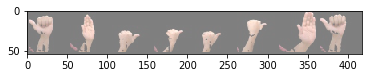

GroundTruth:   prev  stop  next  next


In [18]:
dataiter2 = iter(testloader2)
images2, labels2 = dataiter2.next()

# print images
imshow(torchvision.utils.make_grid(images2))
print('GroundTruth: ', ' '.join('%5s' % classes[labels2[j]] for j in range(4)))

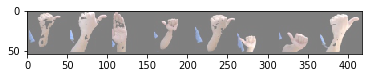

GroundTruth:   next  next  stop  prev


In [19]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))
net.eval()

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1936, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [21]:
outputs2 = net(images2)
_, predicted2 = torch.max(outputs2, 1)

In [22]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [23]:
print('Predicted: ', ' '.join('%5s' % classes[predicted2[j]]
                              for j in range(4)))

Predicted:   prev  stop  next  next


In [24]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   next  next  stop  prev


In [25]:
correct2 = 0
total2 = 0
with torch.no_grad():
    for data in testloader2:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct2 / total2))
print(correct2)
print(total2)

Accuracy of the network on the  test images: 100 %
155
155


In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct / total))
print(correct)
print(total)

Accuracy of the network on the  test images: 98 %
592
599
